# Demonstration of QCA HDF5 Singlepoint Dataset

In [1]:
import h5py as h5
import json
import matplotlib.pyplot as plt

In [2]:
# use command line tool h5glance to get a quick overview of the HDF5 file structure
# The h5 file is divided into entries and specifications
! h5glance dataset_329/dataset_329_master.h5 -d 1

dataset_329/dataset_329_master.h5 (5 attributes)
├entries	(12000 children)
└specifications	(4 children)



In [3]:
# The specifications contain references to the entries 
# and aggregated properties of the dataset.
! h5glance dataset_329/dataset_329_master.h5 specifications -d 2

dataset_329/dataset_329_master.h5/specifications
├spec_1 (10 attributes)
│ ├entry_references	[UTF-8 string: 12000] virtual
│ └properties	(10 children)
├spec_2 (10 attributes)
│ ├entry_references	[UTF-8 string: 0] virtual
│ └properties	(0 children)
├spec_3 (10 attributes)
│ ├entry_references	[UTF-8 string: 12000] virtual
│ └properties	(62 children)
└spec_4 (10 attributes)
  ├entry_references	[UTF-8 string: 0] virtual
  └properties	(0 children)



In [4]:
dataset_name = "dataset_329"
filepath = f"{dataset_name}/{dataset_name}_master.h5"

with h5.File(filepath, "r") as dataset:
    # Get the overall attributes
    print("Overall attributes:")
    for key in dataset.attrs.keys():
        print(f"{key}: {dataset.attrs[key]}")
    element_counts = json.loads(dataset.attrs.get("element_composition", None))


Overall attributes:
description: Data source: https://github.com/PfizerRD/TorsionNet/blob/main/data/
element_composition: {"C": 120744, "N": 25512, "H": 127968, "O": 10752, "S": 1512, "F": 1440, "Cl": 504}
metadata: {"elements": ["N", "Cl", "S", "C", "F", "H", "O"], "submitter": "Pavan Behara, Josh Horton, David Dotson", "dataset_name": "TorsionNet500 Single Points Dataset v1.0", "creation_date": "2021-11-11", "collection_type": "DataSet", "long_description": "Data source: https://github.com/PfizerRD/TorsionNet/blob/main/data/", "short_description": "TorsionNet500 geometries with openff default spec", "long_description_url": "https://github.com/openforcefield/qca-dataset-submission/tree/master/submissions/2021-11-09-TorsionNet500-single-points"}
name: TorsionNet500 Single Points Dataset v1.0
version: 0.1


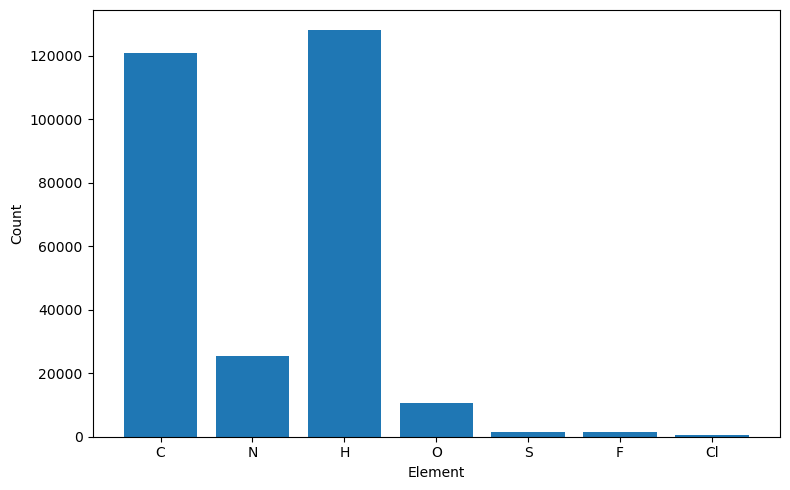

In [5]:
# Can make a plot of the elemental composition
# this was calculated during file creation and stored as metadata in the HDF5 file
elements = list(element_counts.keys())
counts = list(element_counts.values())

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(elements, counts)
plt.xlabel('Element')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [6]:
filepath

'dataset_329/dataset_329_master.h5'

In [7]:
# Let's look at the properties for a specification

with h5.File(filepath, "r") as dataset:
    # Get the specifications group
    specifications_group = dataset["specifications"]

    example_spec = list(specifications_group.keys())[0] 

    print(f"\nSelected specification: {example_spec}")

    # List all items inside the example_spec group
    print(f"\nContents inside specifications/{example_spec}/properties:")
    for name in specifications_group[example_spec]["properties"]:
        print(name)

    # Get return_energy
    return_energy = specifications_group[example_spec]["properties"]["return_result"][:]



Selected specification: spec_1

Contents inside specifications/spec_1/properties:
2-body dispersion correction energy
2-body dispersion correction gradient
b3lyp-d3(bj) dispersion correction energy
b3lyp-d3(bj) dispersion correction gradient
current energy
current gradient
dispersion correction energy
dispersion correction gradient
return_energy
return_result


In [8]:
return_energy

array([array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), ..., array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64)], dtype=object)

In [9]:
print(example_spec)

spec_1


In [10]:
# Let's look at the properties for a specification
spec_filepath = f"{dataset_name}/{example_spec}.h5"
with h5.File(spec_filepath, "r") as dataset:
    # Get the specifications group
    specifications_group = dataset

    example_spec = list(specifications_group.keys())[0] 

    # List all items inside the example_spec group
    print(f"\nContents inside specifications/{example_spec}/properties:")
    for name in specifications_group[example_spec]["aggregated_properties"]:
        print(name)

    # Get return_energy
    return_energy = specifications_group[example_spec]["aggregated_properties"]["return_result"][:]



Contents inside specifications/specification/properties:
2-body dispersion correction energy
2-body dispersion correction gradient
b3lyp-d3(bj) dispersion correction energy
b3lyp-d3(bj) dispersion correction gradient
current energy
current gradient
dispersion correction energy
dispersion correction gradient
return_energy
return_result


In [11]:
return_energy

array([array([-1.11310113e-03, -1.66926533e-04, -1.43593322e-05,  1.36425566e-04,
              -2.97697011e-04,  2.15759635e-05,  1.81826582e-03,  2.33832071e-03,
               1.52657713e-04,  1.93215831e-04,  7.94919075e-04,  1.34317504e-04,
              -3.89455579e-04,  1.52526157e-04, -1.70040053e-04, -8.13917468e-05,
              -3.70999753e-04,  9.80214090e-05,  9.68908930e-05, -2.33870806e-04,
               4.90704445e-05,  4.56996258e-04,  4.58069402e-04,  8.88186155e-05,
              -3.46301030e-04, -1.35359280e-04,  4.46664649e-05,  2.46903173e-04,
              -1.48581599e-04, -9.66326516e-05,  2.41317420e-04,  2.19154215e-04,
              -7.77355309e-05, -2.58717766e-04, -2.52128799e-05, -2.36550481e-06,
               2.32473838e-04, -2.70201875e-04,  7.12215130e-05, -7.68636459e-04,
              -2.45581906e-03, -3.22558223e-04, -2.67906319e-04, -1.42899027e-05,
               3.19972511e-07, -1.02425429e-04, -2.29033888e-04,  7.83893499e-05,
              -1